# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls drive/MyDrive/Great_Learning/Assignments

FDS_Project_LearnerNotebook_FullCode.ipynb  foodhub_order.csv


In [4]:
# read the data
df = pd.read_csv('drive/MyDrive/Great_Learning/Assignments/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [5]:
#df.shape will return the size of the dataframe in the form of (rows, columns)

df.shape

(1898, 9)

#### Observations:
The DataFrame has 1898 rows (customer orders) and 9 columns (categories of information taken about said orders).

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The order_id, customer_id, food_preparation_time, and delivery_time are all 64-bit integers.  The restaurant_name, cuisine_type, day_of_the_week, and rating are all general objects (which encompasses the Dtype string, which all these columns seem to be formatted as).  The cost_of_the_order is a 64-bit float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
### In this commented code, I was skimming through all of the values within the df to identify any missing or erroneous value names
# with pd.option_context('display.max_rows', None):
#   print(pd.value_counts(df.drop(df.columns[0:2], axis=1).values.ravel()))

print(df.isnull().sum())
print()
print(df['rating'].value_counts())

# This is to convert all of the 'Not given' values in rating to NaN (null), allowing me to perform operations on just the given rating
# data without having to drop these columns every time.  In exchange, the column also has to be converted from int type to float, since
# int type does not support a placeholder NaN value.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations:

"Not given", in the rating column, seems to be the only missing value in 736 rows.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:

Minimum, average (mean), and maximum time it takes for food to be prepared after order placement is, respectively, 20 mins, 27.37 mins, and 35 mins.

### **Question 5:** How many orders are not rated?

In [9]:
print(df.isnull().sum())

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


#### Observations:

736 out of 1898 orders are not rated.  Or about 39%.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

### Order ID

In [10]:
print(df['order_id'].nunique(), 'orders were placed with unique ID\'s, meaning there are no duplicate orders in the data')

1898 orders were placed with unique ID's, meaning there are no duplicate orders in the data


### Customer ID

In [11]:
print(df['customer_id'].nunique(), 'unique customers')
ID_counts = df['customer_id'].value_counts()
print("V Mean, median, mode")
print(round(ID_counts.mean(), 2), ID_counts.median(), ID_counts.mode()[0])
print((ID_counts > 1).sum(), 'customers ordered more than once, and about', round((1898-1200)/1898*100, 2),
      'percent of orders were made by repeat customers')

1200 unique customers
V Mean, median, mode
1.58 1.0 1
416 customers ordered more than once, and about 36.78 percent of orders were made by repeat customers


### Restaurant name

In [12]:
print(df['restaurant_name'].nunique(), 'unique restuarants')
restaurant_counts = df['restaurant_name'].value_counts()
print((restaurant_counts > 1).sum(), 'restaurants with repeat orders')

178 unique restuarants
128 restaurants with repeat orders


### Cuisine type

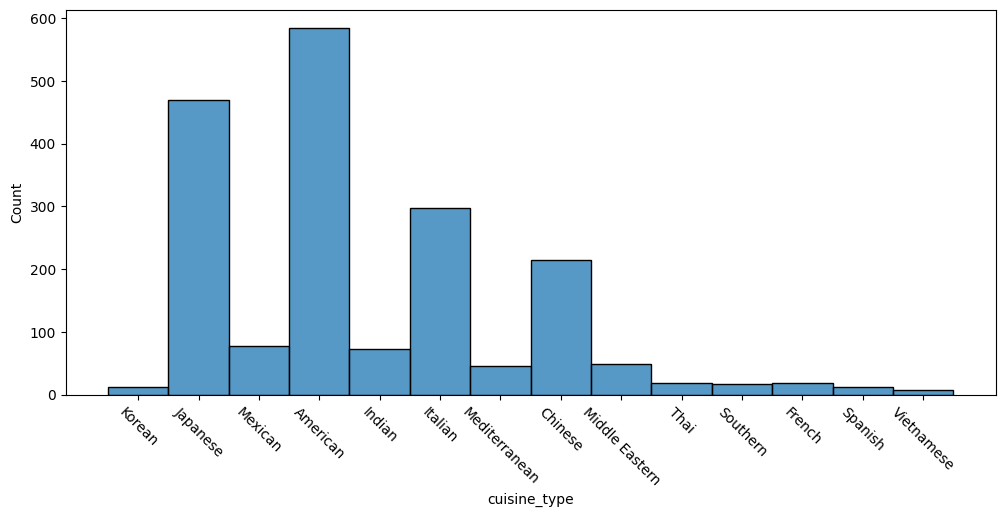

In [13]:
plt.figure(figsize=(12,5))
sns.histplot(data=df['cuisine_type'])
plt.xticks(rotation = -45)
plt.show()

It appears that American and Japanese are the two most popular cuisine types, followed by Italian and Chinese.  Vietnamese, Spanish, and Korean appear to be the least ordered types.

### Cost of the order

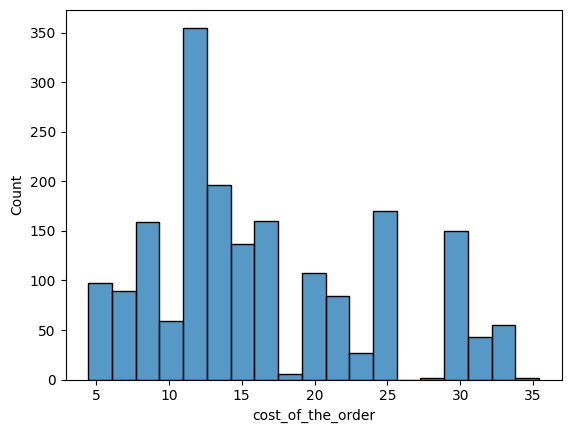

<Axes: ylabel='cost_of_the_order'>

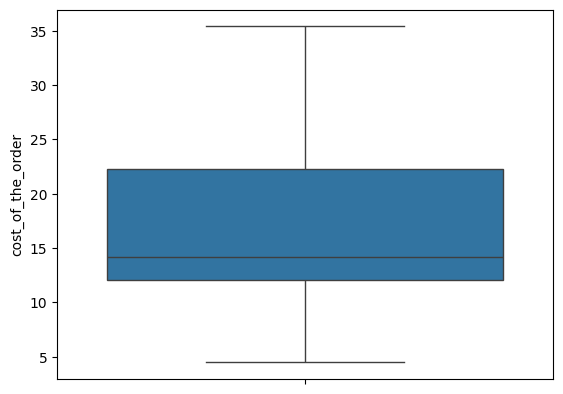

In [14]:
sns.histplot(data=df['cost_of_the_order'])
plt.show()
sns.boxplot(data=df['cost_of_the_order'])

There seem to be price ranges where order costs tend to fall into.  This is potentially dependent on the number of items that customers decide to purchase within each order.  Also, most orders seem to sit between 10 and 25 dollars, with reasonable variance ranging from 5 to 35 dollars.

### Day of the week

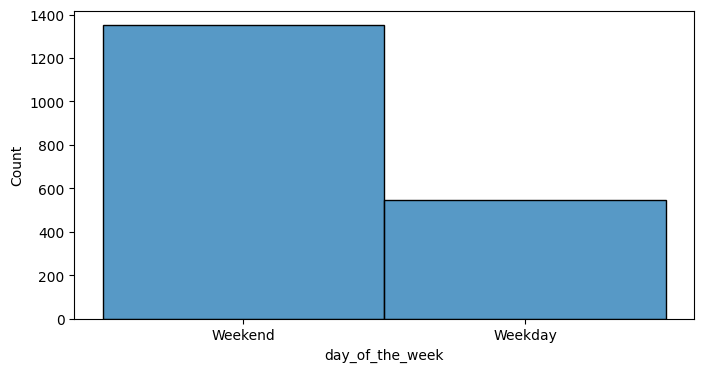

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(data=df['day_of_the_week'])
plt.show()

More than twice as many orders were placed over the weekend than on weekdays.

### Rating

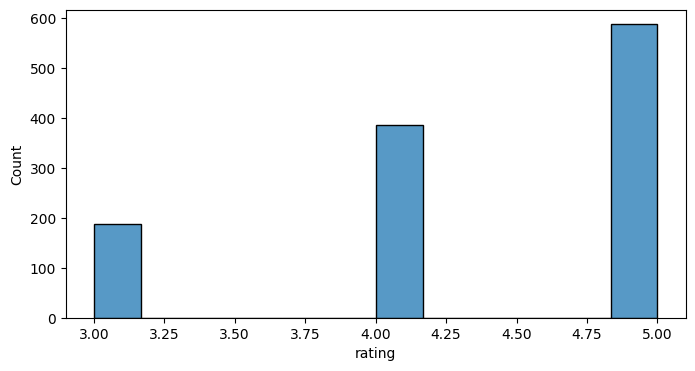

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(data=df['rating'])
plt.show()

Most recorded ratings are 5, decreasing nearly linearly by steps of 200 to 4 and then 3.  5 is the highest rating and 3 is the lowest.  If the non-recorded ratings were not removed, this would actually be the most common rating with 736 recorded instances.

### Food preparation time

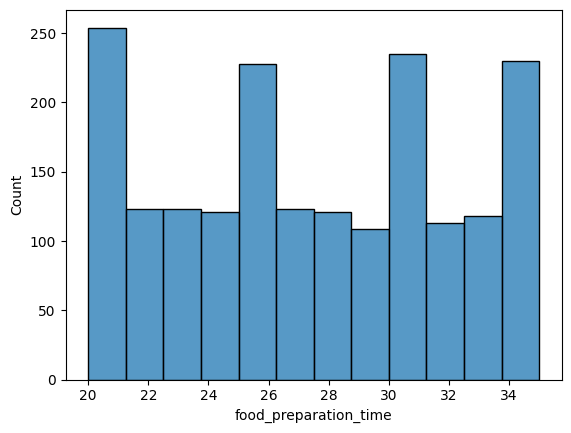

<Axes: ylabel='food_preparation_time'>

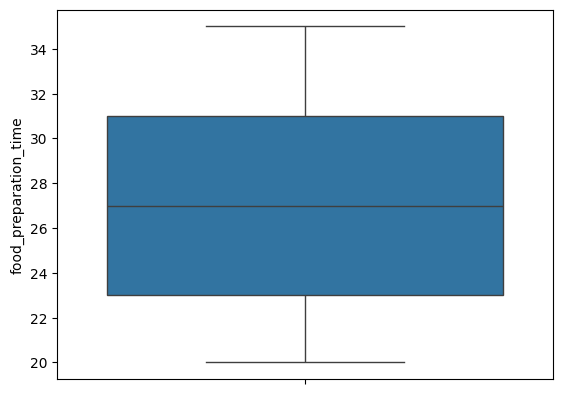

In [17]:
sns.histplot(data=df['food_preparation_time'])
plt.show()
sns.boxplot(data=df['food_preparation_time'])

Food preparation time has a relatively uniform distribution aside from spikes around 20, 25, 30, and 35 minutes.  This could potentially be due to some prep time reports being rounded to the nearest 5 minute interval.

The preparation time's IQR ranges from about 31 to 23 minutes, with a reasonable range between 35 and 20 minutes.

### Food delivery time

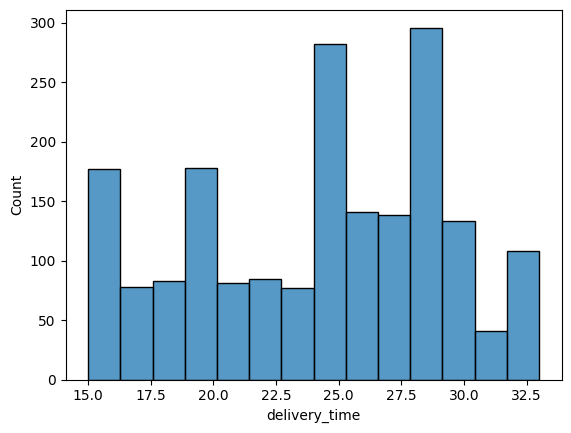

<Axes: ylabel='delivery_time'>

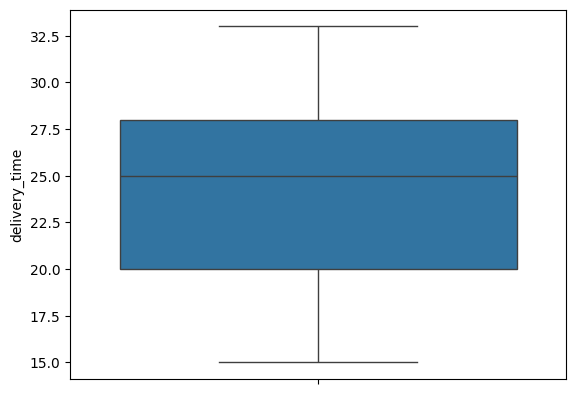

In [18]:
sns.histplot(data=df['delivery_time'])
plt.show()
sns.boxplot(data=df['delivery_time'])

The food delivery time's distribution also appears to be relatively flat with occasional spikes, but it is less close to uniform than the preparation time's distribution.  There are also particularly high frequency spikes around 25 and 28 for food delivery time.

The delivery time's IQR ranges from about 27.5 to 20 minutes, with a reasonable range between 32.5 and 15 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [19]:
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


#### Observations:
The top 5 restaurants, in order, are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends?

In [20]:
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:
American is the most popular cuisine type on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [21]:
df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100

29.24130663856691

#### Observations:
Approximately 29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [22]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is approximately 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [23]:
df['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1


#### Observations:
Customer IDs 52832, 47440, and 83287 were the most frequent, with 13, 10, and 9 orders respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

### Heatmap / correlation check

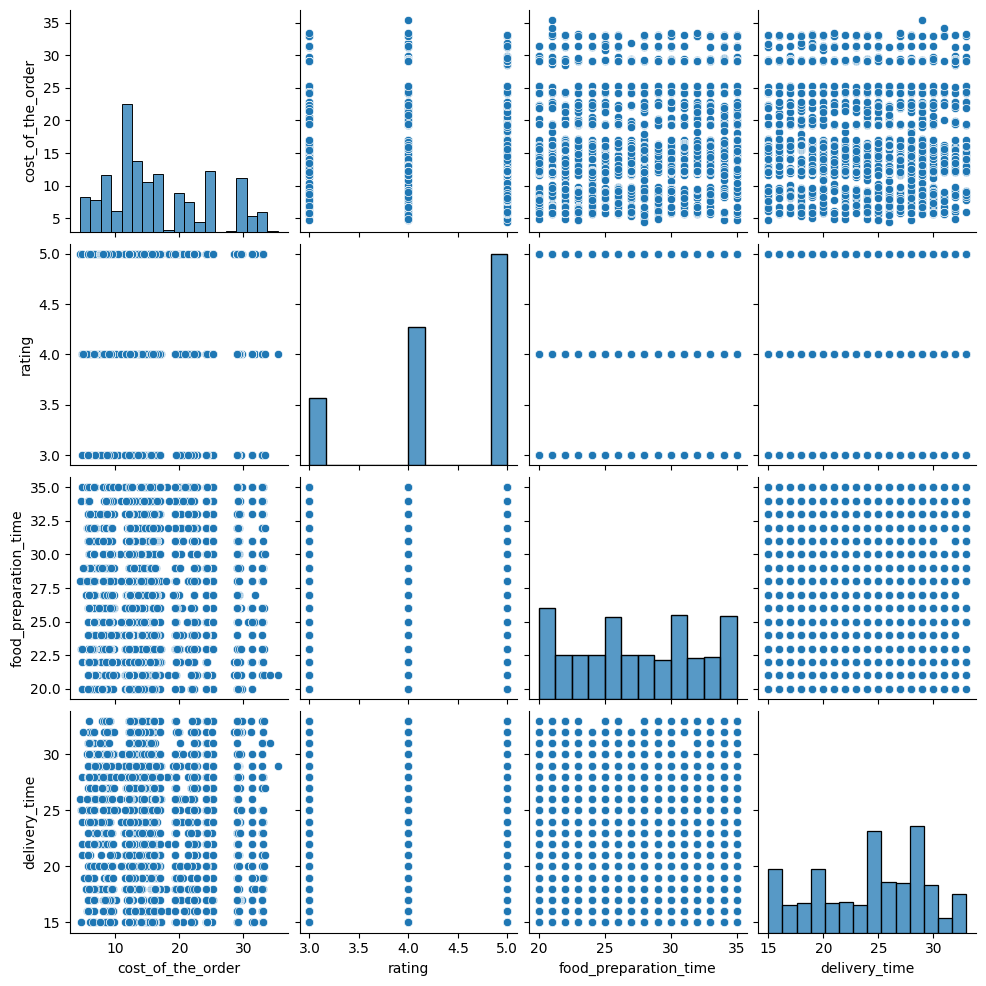

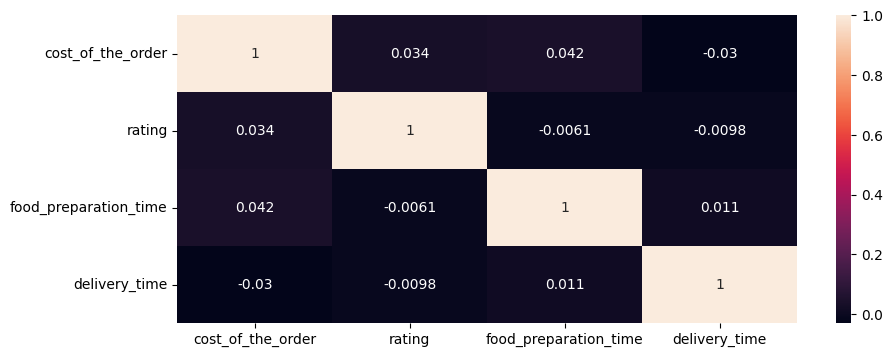

In [24]:
sns.pairplot(data= df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']])
plt.show()

plt.figure(figsize=(10,4))
sns.heatmap(data=df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr(), annot=True)
plt.show()

No notable numeric correlations

### Cuisine type vs cost, preparation time, and rating

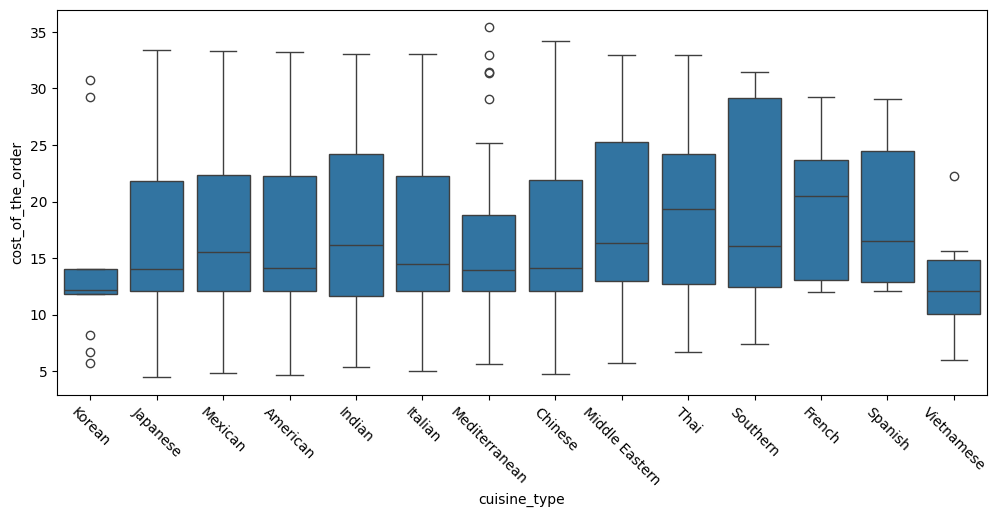

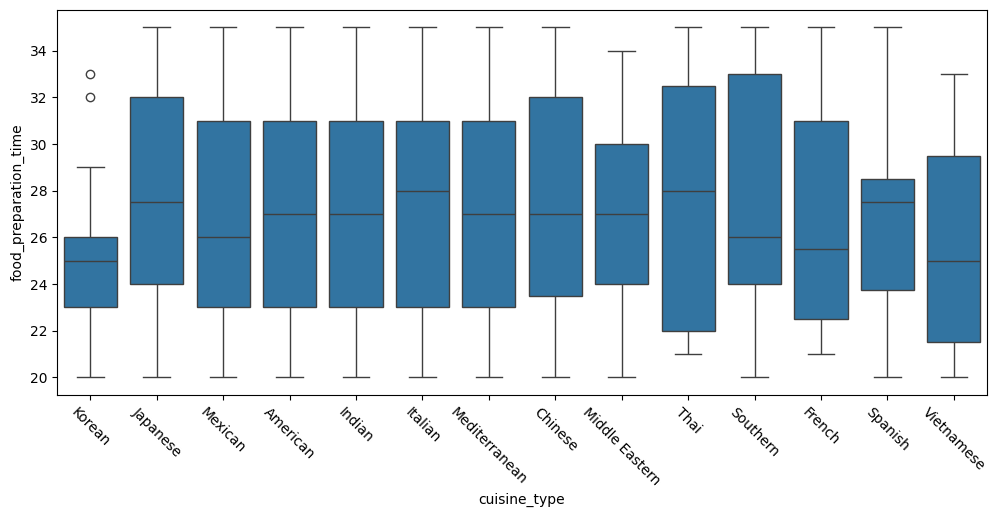

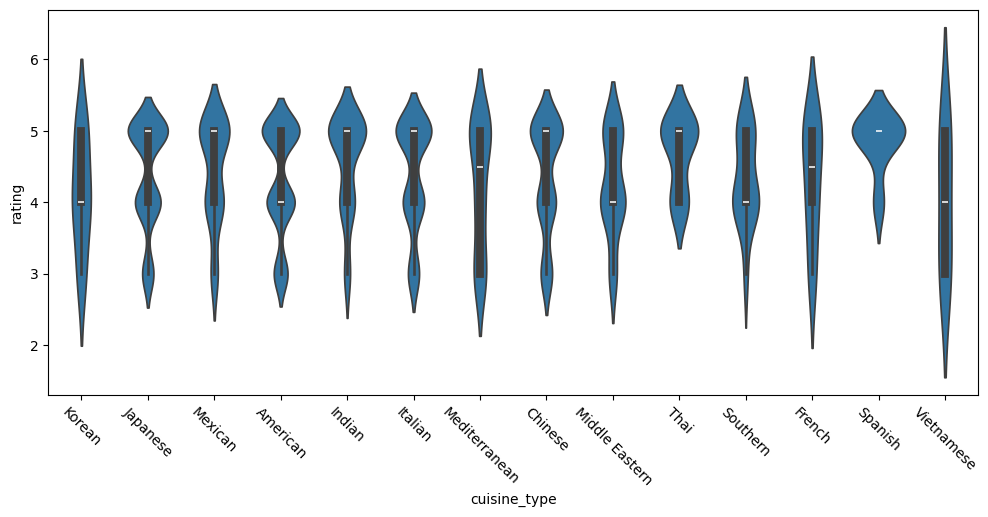

(rating
 5.0    2
 3.0    2
 4.0    1
 Name: count, dtype: int64,
 rating
 5.0    5
 4.0    1
 Name: count, dtype: int64,
 rating
 4.0    4
 5.0    3
 3.0    2
 Name: count, dtype: int64)

In [25]:
# Box plot distrubution of cost of the order compared with cuisine type
plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = -45)
plt.show()
print()

# Box plot distrubution of food preparation time compared with cuisine type
plt.figure(figsize=(12,5))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = -45)
plt.show()
print()

# Violin plot distrubution of rating compared with cuisine type
plt.figure(figsize=(12,5))
sns.violinplot(x = "cuisine_type", y = "rating", data = df)
plt.xticks(rotation = -45)
plt.show()

df[df['cuisine_type'] == 'Vietnamese']['rating'].value_counts(), df[df['cuisine_type'] == 'Spanish']['rating'].value_counts(), df[df['cuisine_type'] == 'Korean']['rating'].value_counts()

Vietnamese and Korean (and somewhat Mediterranean) cuisine types seem to have noticeably cheaper orders than the other types, however this might be due to increased variance considering that there were only 5 and 9 total orders placed, respectively.  This also could explain why the Korean preparation time box plot seems to be lower than the others.  Overall, while there is some variation in median and IQR for the cuisine plots, I notice nothing significant.

#### Number of restaurants for each cuisine type

In [26]:
restaurants = list(df['restaurant_name'].value_counts().index)
cuisines = list(df['cuisine_type'].value_counts().index)
restaurant_cuisine_count = {key: 0 for key in cuisines}

# this loops through each individual restaurant, taking it's first instance within the dataframe, and increments the count of
# the associated cuisine.
for r in restaurants:
  c = df.loc[df['restaurant_name'] == r].iloc[0]['cuisine_type']
  restaurant_cuisine_count[c] += 1

restaurant_cuisine_count

{'American': 40,
 'Japanese': 29,
 'Italian': 31,
 'Chinese': 16,
 'Mexican': 11,
 'Indian': 14,
 'Middle Eastern': 7,
 'Mediterranean': 5,
 'Thai': 9,
 'French': 3,
 'Southern': 2,
 'Korean': 5,
 'Spanish': 3,
 'Vietnamese': 3}

#### Cuisine popularity normalized for the amount of restaurants offering that cuisine

In [27]:
cuisine_freq = df['cuisine_type'].value_counts()

# Now we loop through each cuisine type and normalize the amount of orders placed based on the amount of restaurants that actually offer that type of cuisine
normalized_cuisine_frequencies = {key: 0 for key in cuisines}
for c in cuisines:
  normalized_cuisine_frequencies[c] = cuisine_freq[c] / restaurant_cuisine_count[c]

normalized_cuisine_frequencies

{'American': 14.6,
 'Japanese': 16.20689655172414,
 'Italian': 9.612903225806452,
 'Chinese': 13.4375,
 'Mexican': 7.0,
 'Indian': 5.214285714285714,
 'Middle Eastern': 7.0,
 'Mediterranean': 9.2,
 'Thai': 2.111111111111111,
 'French': 6.0,
 'Southern': 8.5,
 'Korean': 2.6,
 'Spanish': 4.0,
 'Vietnamese': 2.3333333333333335}

### Analysis of variables potentially affecting gross revenue

Including cuisine type, restaurant name, day of week, and rating

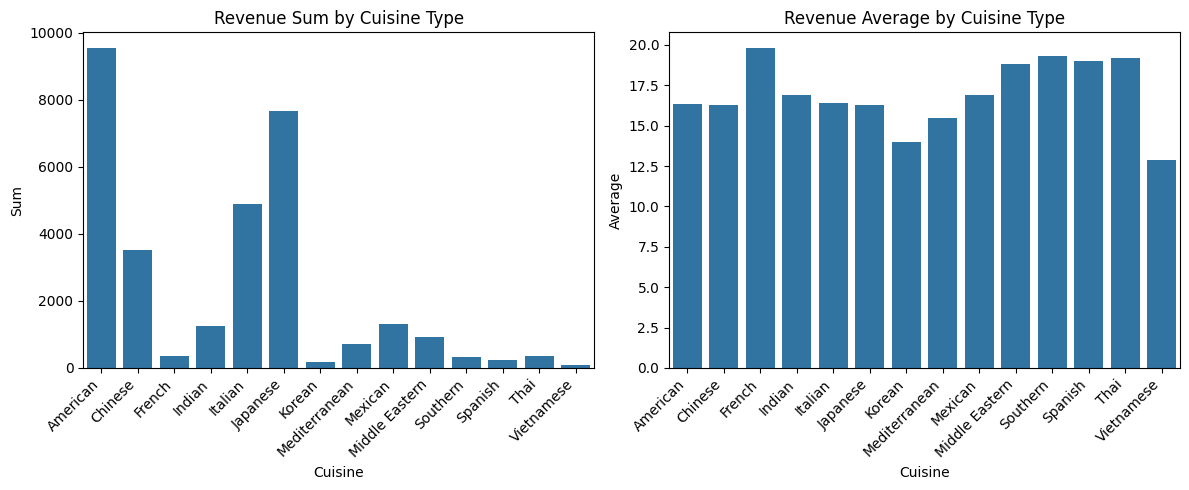

In [28]:
sum_by_cuisine_type = df.groupby(['cuisine_type'])['cost_of_the_order'].sum().reset_index()
sum_by_cuisine_type.columns = ["Cuisine", "Sum"]
avg_by_cuisine_type = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().reset_index()
avg_by_cuisine_type.columns = ["Cuisine", "Average"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data = sum_by_cuisine_type, x='Cuisine', y='Sum', ax=axes[0])
axes[0].set_title('Revenue Sum by Cuisine Type')
sns.barplot(data = avg_by_cuisine_type, x='Cuisine', y='Average', ax=axes[1])
axes[1].set_title('Revenue Average by Cuisine Type')

for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

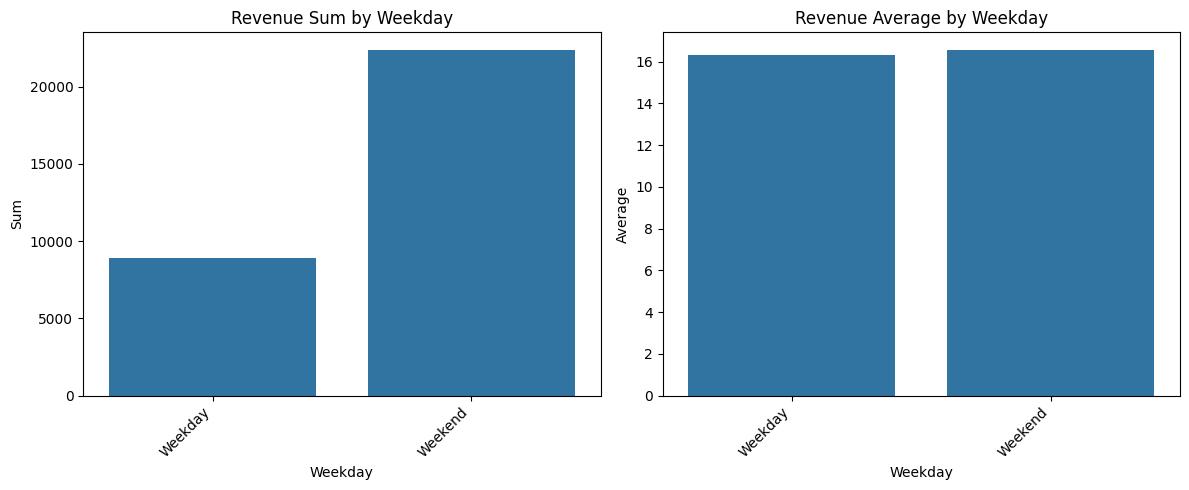

In [29]:
sum_by_weekday = df.groupby(['day_of_the_week'])['cost_of_the_order'].sum().reset_index()
sum_by_weekday.columns = ["Weekday", "Sum"]
avg_by_weekday = df.groupby(['day_of_the_week'])['cost_of_the_order'].mean().reset_index()
avg_by_weekday.columns = ["Weekday", "Average"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data = sum_by_weekday, x='Weekday', y='Sum', ax=axes[0])
axes[0].set_title('Revenue Sum by Weekday')
sns.barplot(data = avg_by_weekday, x='Weekday', y='Average', ax=axes[1])
axes[1].set_title('Revenue Average by Weekday')

for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

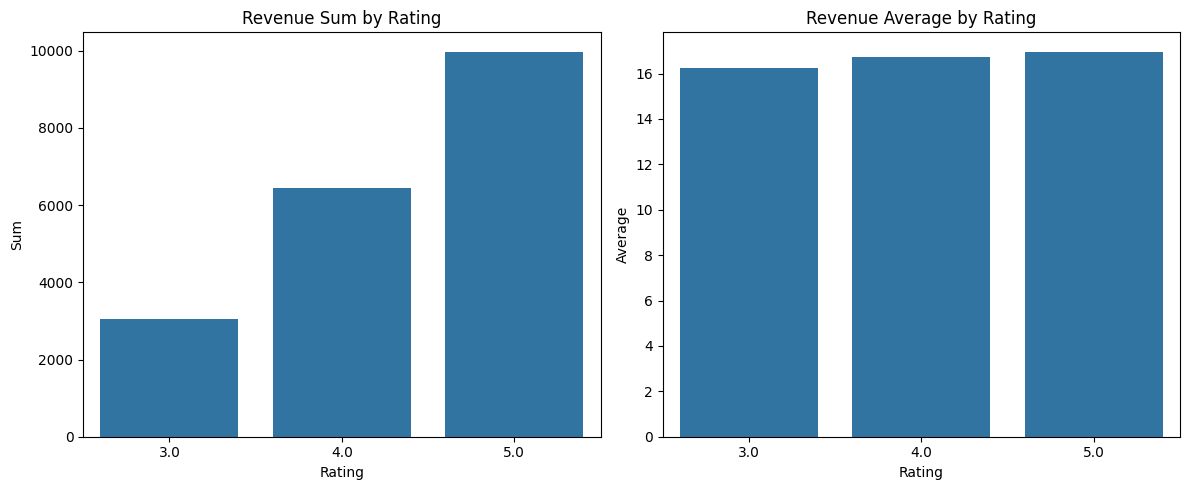

In [30]:
sum_by_rating = df.groupby(['rating'])['cost_of_the_order'].sum().reset_index()
sum_by_rating.columns = ["Rating", "Sum"]
avg_by_rating = df.groupby(['rating'])['cost_of_the_order'].mean().reset_index()
avg_by_rating.columns = ["Rating", "Average"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data = sum_by_rating, x='Rating', y='Sum', ax=axes[0])
axes[0].set_title('Revenue Sum by Rating')
sns.barplot(data = avg_by_rating, x='Rating', y='Average', ax=axes[1])
axes[1].set_title('Revenue Average by Rating')

plt.tight_layout()
plt.show()

In [31]:
print(df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10))

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64


### Rating vs total time to be delivered and cost

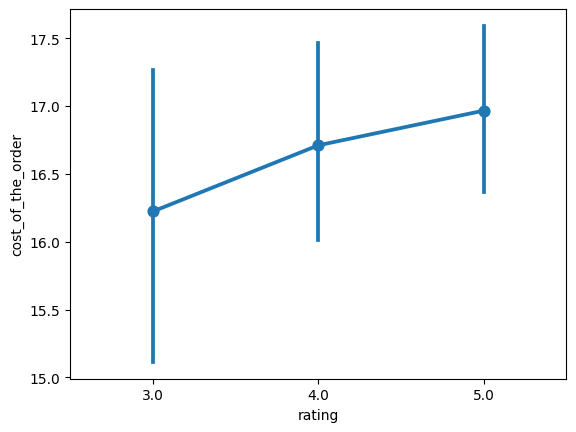

In [32]:
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order')
plt.show()

Interestingly, cost seems to increase slightly with rating.  This is a very slight correlation, however, considering that the confidence intervals are relatively large to the observed cost increase, and considering that this cost increase is on the magnitude of a single dollar.

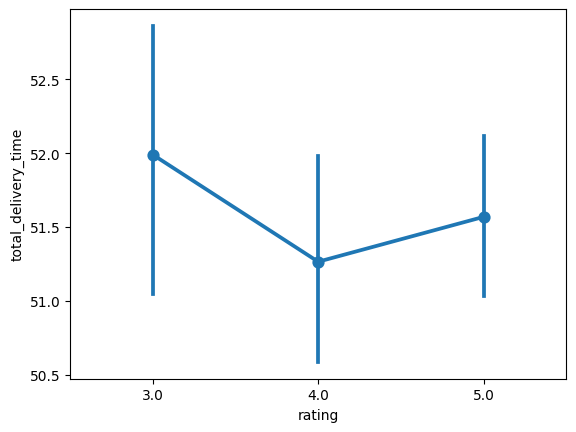

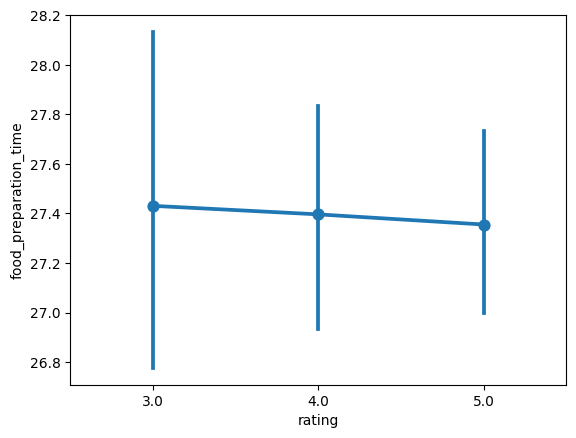

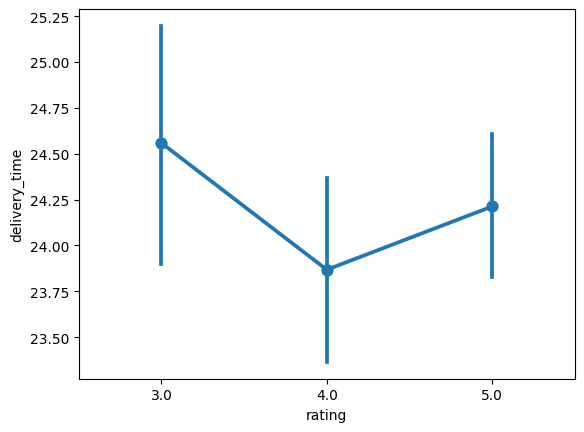

In [33]:
df_total_time = df.copy()
df_total_time['total_delivery_time'] = df_total_time['food_preparation_time'] + df_total_time['delivery_time']

sns.pointplot(data = df_total_time, x = 'rating', y = 'total_delivery_time')
plt.show()
sns.pointplot(data = df_total_time, x = 'rating', y = 'food_preparation_time')
plt.show()
sns.pointplot(data = df_total_time, x = 'rating', y = 'delivery_time')
plt.show()

There seems to be some relationship with rating and total delivery time, that upon further digging, seems to be almost entirely related to delivery time, and not food preparation time.

This would make since that delivery time has more of an impact of customer rating than preparation time, because the longer it takes to deliver, the colder the food would likely be upon arrival.  It is hard to find any meaningful correlation or conclusion from this, however, because average delivery time goes back up again with rating of 5, only dipping for ratings of 4.

### What are repeat customers ordering?

restaurant_name
Shake Shack                      113
Blue Ribbon Sushi                 91
The Meatball Shop                 71
Blue Ribbon Fried Chicken         58
RedFarm Broadway                  39
Parm                              38
Blue Ribbon Sushi Bar & Grill     32
Nobu Next Door                    28
RedFarm Hudson                    28
TAO                               27
Han Dynasty                       23
Sushi of Gari 46                  20
Tamarind TriBeCa                  19
Momoya                            18
Blue Ribbon Sushi Izakaya         18
Name: count, dtype: int64



[]

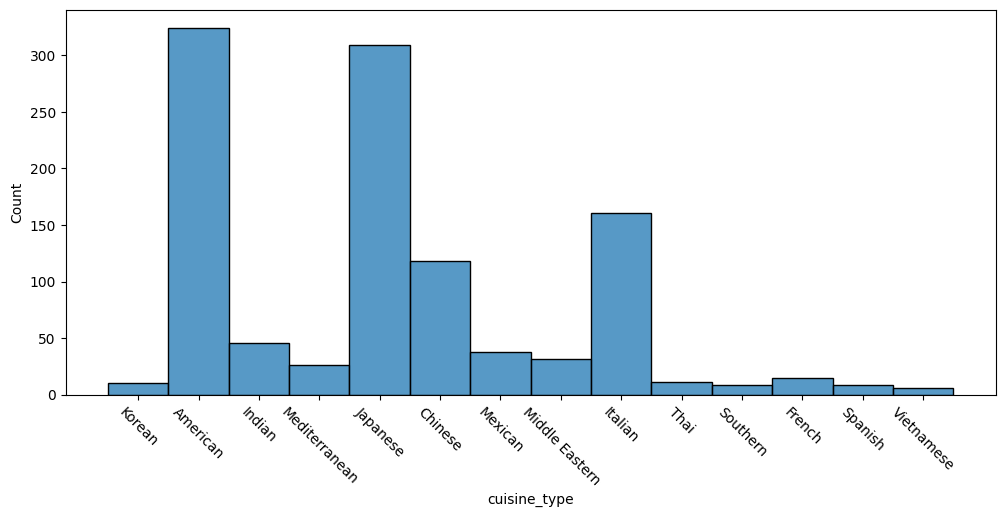

In [34]:
ID_counts = df['customer_id'].value_counts()
repeat_customers = list(ID_counts[ID_counts > 1].index)

filtered_df = df[df['customer_id'].isin(repeat_customers)]
print(filtered_df['restaurant_name'].value_counts().head(15))
print()
plt.figure(figsize=(12,5))
sns.histplot(filtered_df['cuisine_type'])
plt.xticks(rotation = -45)
plt.plot()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [35]:
df_has_rating = df.dropna()

rating_counts = df_has_rating.groupby(['restaurant_name'])['rating'].count()
rating_counts[rating_counts >= 50]

,rating
restaurant_name,
Blue Ribbon Fried Chicken,64
Blue Ribbon Sushi,73
Shake Shack,133
The Meatball Shop,84


In [36]:
names_over_50 = list(rating_counts[rating_counts >= 50].index)
print('Restaurants with over 50 ratings:', names_over_50)
df_names_over_50 = df_has_rating[df_has_rating['restaurant_name'].isin(names_over_50)]
df_names_over_50.groupby('restaurant_name')['rating'].mean() > 4

Restaurants with over 50 ratings: ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


,rating
restaurant_name,
Blue Ribbon Fried Chicken,True
Blue Ribbon Sushi,True
Shake Shack,True
The Meatball Shop,True


#### Observations:
It appears that Shake Shack, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and The Meatball Shop are the only four restaurants with over 50 ratings, which all happen to also have an average rating of over greater than 4.  So all four of the aforementioned restaurants should be eligible for the promotion.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [37]:
revenue25 = 0
revenue15 = 0

for i, r in df.iterrows():
  if r['cost_of_the_order'] > 20:
    revenue25 += r['cost_of_the_order'] * 0.25
  elif r['cost_of_the_order'] > 5:
    revenue15 += r['cost_of_the_order'] * 0.15

revenue = revenue25 + revenue15
print('Total revenue from orders over $20:', revenue25)
print('Total revenue from orders over $5:', revenue15)
print('Total revenue is', round(revenue,2), 'dollars.')

Total revenue from orders over $20: 3688.7275000000027
Total revenue from orders over $5: 2477.5755000000036
Total revenue is 6166.3 dollars.


#### Observations:
The company made approximately $6166.30 across all orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [38]:
def more_than_60(row):
  total_time = row['food_preparation_time'] + row['delivery_time']
  return True if total_time>60 else False

orders_over_60 = df[['food_preparation_time','delivery_time']].apply(more_than_60, axis=1).sum()
print(orders_over_60)

print('The percentage of orders that took more than 60 minutes to get delivered is', orders_over_60 / df.shape[0] * 100, 'percent.')

200
The percentage of orders that took more than 60 minutes to get delivered is 10.537407797681771 percent.


#### Observations:
The percentage of orders that took more than 60 minutes to get delivered is approximately 10.54%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [39]:
weekend_mean_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
weekday_mean_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

print("Weekend mean delivery time:", weekend_mean_time)
print("Weekday mean delivery time:", weekday_mean_time)

Weekend mean delivery time: 22.4700222057735
Weekday mean delivery time: 28.340036563071298


#### Observations:
On average, it seems to take almost 6 more minutes to deliver orders during the week than on the weekends.  This would make sense considering that traffic can often be heavier during weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  While at first glance, it may seem like American is the most popular cuisine, this could very possibly be due simply to the fact that American is the most common restuarant type on FoodHub.  When taking this into account, Japanese actually seems to be the most popular cuisine type, followed by American and then Chinese.  Japanese cuisine is also ordered proportionally more frequently by repeat customers than other cuisine types.

* Delivery time takes significantly longer on the weekdays than weekends, and significantly more orders are placed on the weekends than weekdays.

### Recommendations:

*  Of all of the cuisine types, it seems that Japanese is performing the strongest.  Especially when accounting for amount of restaurants available on the app.  FoodHub should consider running promotions with some of their Japanese restaurants or adding more Japanese restaurants to the app.

* Because delivery times have been found to take longer on the weekdays and because more orders are placed over the weekends, FoodHub should consider running promotions or incentives for its users to order food on the weekdays in order to maximize order numbers and user consistency.

* The four clear front runners in terms of cuisine popularity are American, Japanese, Chinese, and Italian.  These are also the four most heavily represented cuisine types in terms of number of restaurants on FoodHub.  It has hard to say from this dataset whether this is correlational or causational, but it may be worth considering adding more restaurants of other cuisine types, and seeing if their order frequency increases to similar amounts as these four.

* Over 50% of net revenue is coming from orders over 20 dollars.  This would not be the case if FoodHub took more percentage profit from orders over 5 dollars.  Perhaps it is worth charging more of a percentage stake on orders over 5 dollars in order to increase profit from smaller orders (if it does not decrease customer satisfaction too much due to increased prices on cheaper orders).